<a href="https://colab.research.google.com/github/maeve70/TennisRegressionModels/blob/main/TennisRegressionModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practice building single feature and multiple feature linear regression models.
Data --tennis stats--from DS Codecademy course. Data is from the ATP (Assoc. of Tennis Professionals). Apparently, the ATP is only men. That's crap. I will do this with women's tennis data as well.

Just like in crochet, this is a WIP. I will tweak it more, once I learn more.


In [1]:
import seaborn as sns;
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/maeve70/csvfiles/main/tennis_stats.csv')

In [3]:
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [8]:
df.shape

(1721, 24)

In [9]:
df.isnull().sum().sum()

0

In [5]:
df.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


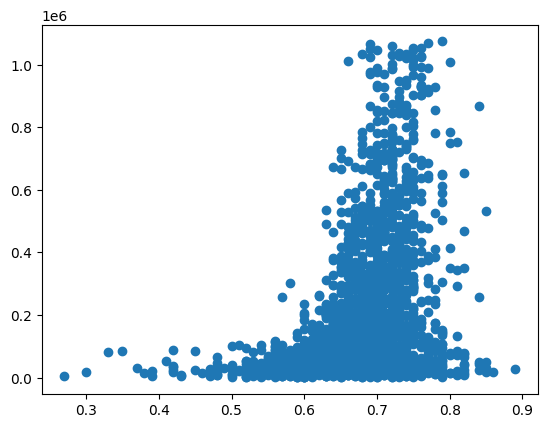

In [19]:
plt.scatter(x='FirstServePointsWon', y='Winnings', data=df)
plt.show()

#plt.clf()

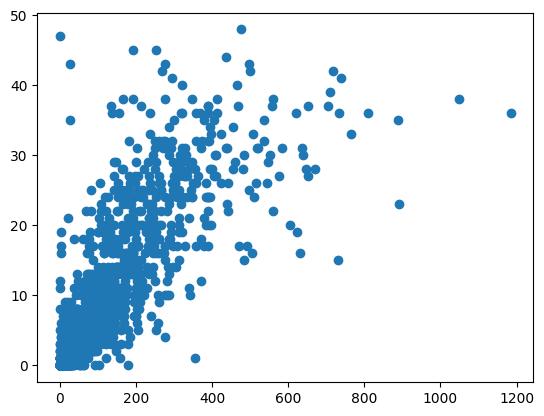

In [12]:
plt.scatter(x='Aces', y='Wins', data=df)
plt.show()

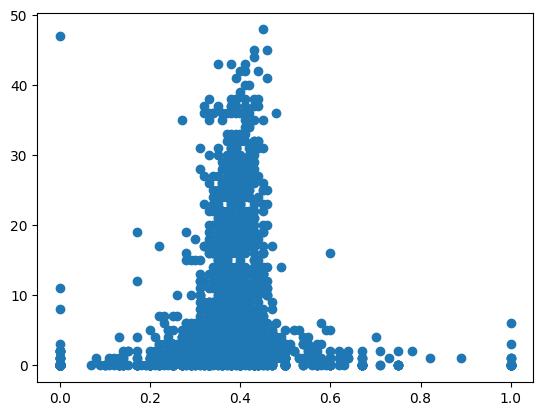

In [23]:
plt.scatter(x='BreakPointsConverted', y='Wins', data=df)
plt.show()

Let's see if FirstServePointsWon can predict Wins

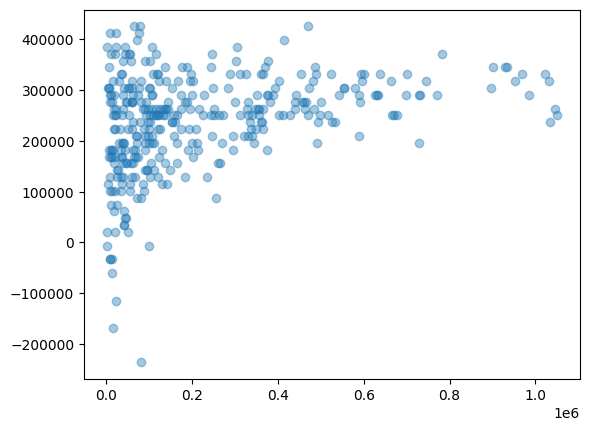

In [21]:
#pick the variable and the outcome
features = df[['FirstServePointsWon']]
outcome = df[['Winnings']]

#split the data into train & test
features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)

#create a model & train it on training data
model = LinearRegression()
model.fit(features_train, outcome_train)

#score the model on the test data
model.score(features_test, outcome_test)

#used predicted outcome from model and plotted it against the actual outcome

prediction = model.predict(features_test)

plt.scatter(outcome_test, prediction, alpha = 0.4)
plt.show()

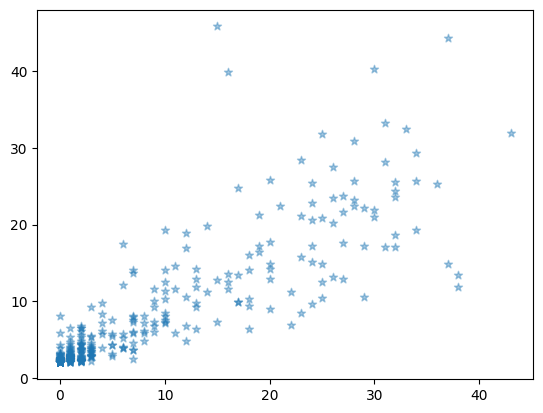

In [25]:
features = df[['Aces']]
outcome = df[['Wins']]

#split the data into train & test
features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)

#create a model & train it on training data
model = LinearRegression()
model.fit(features_train, outcome_train)

#score the model on the test data
model.score(features_test, outcome_test)

#used predicted outcome from model and plotted it against the actual outcome

prediction = model.predict(features_test)

plt.scatter(outcome_test, prediction, marker= '*', alpha = 0.4)
plt.show()

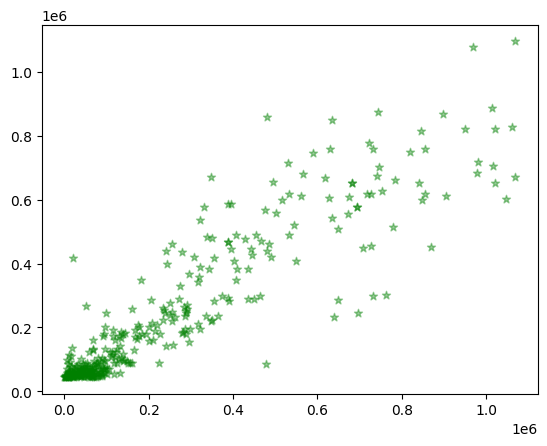

In [27]:
features = df[['BreakPointsOpportunities']]
outcome = df[['Winnings']]

#split the data into train & test
features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)

#create a model & train it on training data
model = LinearRegression()
model.fit(features_train, outcome_train)

#score the model on the test data
model.score(features_test, outcome_test)

#used predicted outcome from model and plotted it against the actual outcome

prediction = model.predict(features_test)

plt.scatter(outcome_test, prediction, marker= '*', color='green', alpha = 0.4)
plt.show()

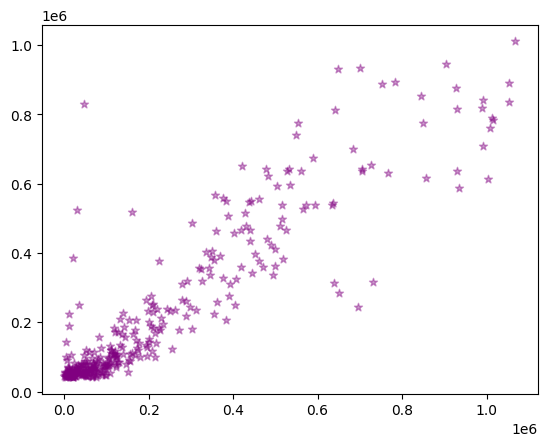

In [29]:
#Let's try two features.
features = df[['BreakPointsOpportunities', 'Aces']]
outcome = df[['Winnings']]

#split the data into train & test
features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)

#create a model & train it on training data
model = LinearRegression()
model.fit(features_train, outcome_train)

#score the model on the test data
model.score(features_test, outcome_test)

#used predicted outcome from model and plotted it against the actual outcome

prediction = model.predict(features_test)

plt.scatter(outcome_test, prediction, marker= '*', color='purple', alpha = 0.4)
plt.show()

In [30]:
df.head(2)

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381


In [ ]:
features = df[['BreakPointsOpportunities', 'Aces']]
outcome = df[['Winnings']]


#split the data into train & test
features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)

#create a model & train it on training data
model = LinearRegression()
model.fit(features_train, outcome_train)

#score the model on the test data
model.score(features_test, outcome_test)

#used predicted outcome from model and plotted it against the actual outcome

prediction = model.predict(features_test)

plt.scatter(outcome_test, prediction, marker= '*', color='purple', alpha = 0.4)
plt.show()



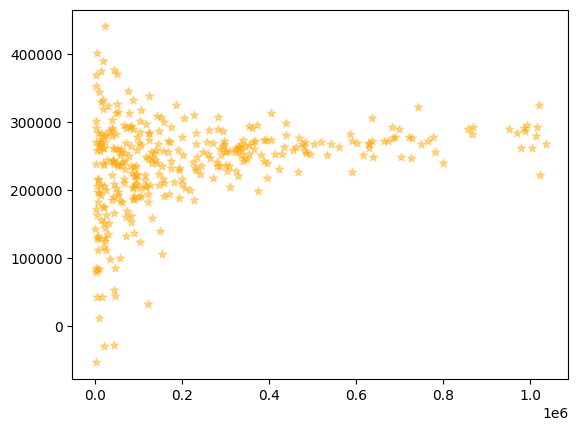

In [33]:
features = df[['SecondServePointsWon', 'BreakPointsConverted']]
outcome = df[['Winnings']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)

model = LinearRegression()
model.fit(features_train, outcome_train)

model.score(features_test, outcome_test)

prediction = model.predict(features_test)

plt.scatter(outcome_test, prediction, marker='*', color='orange', alpha=0.4)

plt.show()